In [1]:
import pandas as pd
import numpy as np
import keras
import cv2
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
train  = pd.read_csv("../input/sign-language-mnist/sign_mnist_train.csv")
test = pd.read_csv("../input/sign-language-mnist/sign_mnist_test.csv")

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
y_train_label = train.iloc[:,0]
y_test_label = test.iloc[:,0]

In [5]:
train = train.iloc[:,1:]
test = test.iloc[:,1:]

In [6]:
train_x = train.values
test_x = test.values
train_x

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [7]:
train_x.shape

(27455, 784)

In [8]:
train_x = train_x - np.mean(train_x) / train_x.std()
test_x = test_x - np.mean(test_x) / train_x.std()

In [9]:
train_x = train_x.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

In [10]:
train_x[0].shape

(28, 28, 1)

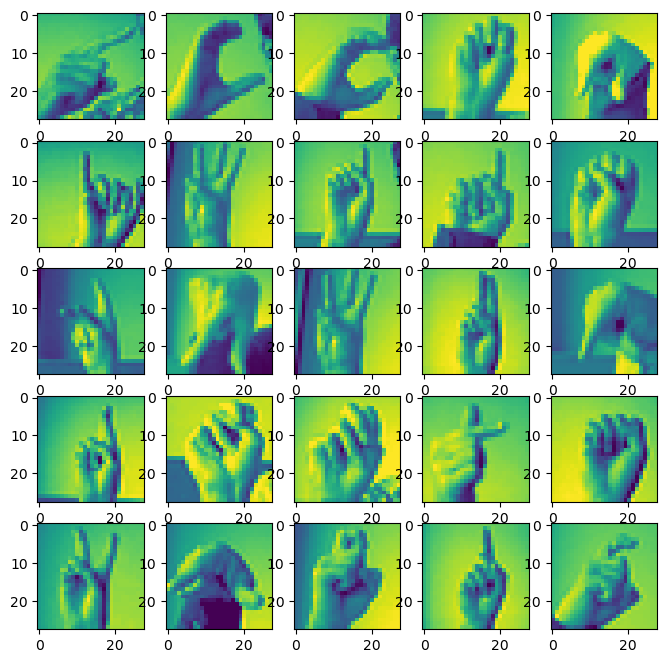

In [11]:
w=10
h=10
fig=plt.figure(figsize=(8,8))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = train_x[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.squeeze(img))
plt.show()

In [12]:
LB = LabelBinarizer()
y_train_label = LB.fit_transform(y_train_label)
y_test_label = LB.fit_transform(y_test_label)
y_train_label.shape

(27455, 24)

In [13]:
xtrain,xval,ytrain,yval=train_test_split(train_x, y_train_label,train_size=0.75,random_state=0)

In [14]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,    
        rotation_range=15,    
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=False)

In [15]:
datagen.fit(xtrain)

In [16]:
model = Sequential()
 
model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='softmax'))

In [17]:
learning_rate = 1e-3
lr_decay = 1e-6
sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [18]:
print(xtrain.shape, xval.shape)

(20591, 28, 28, 1) (6864, 28, 28, 1)


In [20]:
history = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=32),
                    steps_per_epoch=xtrain.shape[0]//32,
                    epochs=10,
                    verbose=1,
                    validation_data=(xval, yval))

Epoch 1/10


/tmp/ipykernel_32/470461756.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=32),


643/643 [==============================] - 128s 199ms/step - loss: 3.1773 - accuracy: 0.0449 - val_loss: 3.1772 - val_accuracy: 0.0439
Epoch 2/10
643/643 [==============================] - 127s 197ms/step - loss: 3.1765 - accuracy: 0.0473 - val_loss: 3.1769 - val_accuracy: 0.0439
Epoch 3/10
643/643 [==============================] - 129s 201ms/step - loss: 3.1761 - accuracy: 0.0474 - val_loss: 3.1767 - val_accuracy: 0.0439
Epoch 4/10
643/643 [==============================] - 130s 201ms/step - loss: 3.1757 - accuracy: 0.0475 - val_loss: 3.1768 - val_accuracy: 0.0439
Epoch 5/10
643/643 [==============================] - 130s 202ms/step - loss: 3.1755 - accuracy: 0.0475 - val_loss: 3.1768 - val_accuracy: 0.0439
Epoch 6/10
643/643 [==============================] - 130s 202ms/step - loss: 3.1754 - accuracy: 0.0475 - val_loss: 3.1768 - val_accuracy: 0.0439
Epoch 7/10
643/643 [==============================] - 130s 202ms/step - loss: 3.1753 - accuracy: 0.0476 - val_loss: 3.1769 - val_accura

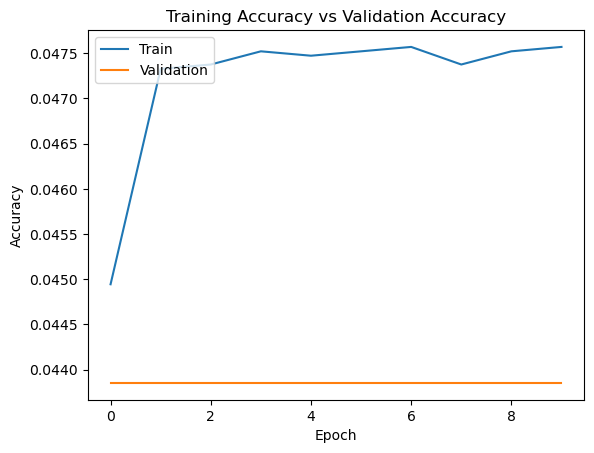

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

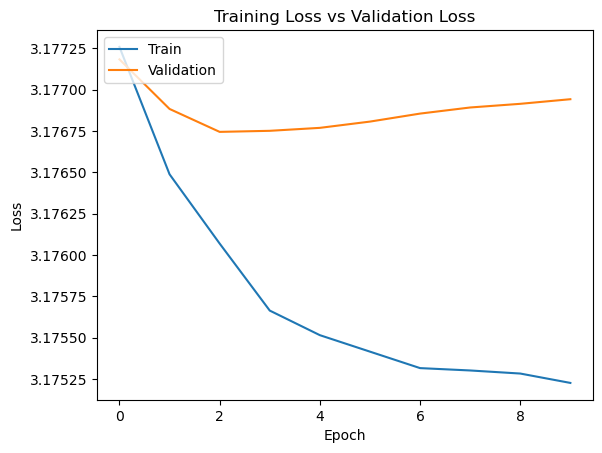

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [23]:
score = model.evaluate(test_x, y_test_label, verbose=0)
print("Loss: " + str(score[0]))
print("Accuracy: " + str(score[1]*100) + "%")

Loss: 3.200481414794922
Accuracy: 2.286670356988907%
